### Task1.
For a sample $x_1, \ldots, x_n$ from some normal distribution (with unknown variance and expectation) we know that
$$
\frac{\sqrt{n}(\bar{x}-\mu)}{\tilde{s}} \sim t_{n-1},
$$
where $t_{n-1}$ is a Student t-distribution with $n-1$ degrees of freedom (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.htmlLink to python documentation). Compute confidence intervals for the expectation for different sizes of a sample. What happens when $n$ is small?

In [6]:
from scipy.stats import t, norm
from math import sqrt
import matplotlib.pyplot as plt

In [14]:
def get_confidence_interval(series, alpha):
    n = len(series)
    mean = series.mean()
    var = series.var()
    z1, z2 = t.interval(alpha, n - 1)
    return mean - z2 * var / sqrt(n), mean + z2 * var / sqrt(n)

Let's first evaluate the probability that the theoretical mean is in the calculated confidence interval of level $\alpha$. The resulting plot looks like a linear one which means that the theoretical mean really gets into the confidence interval in the needed percent of samples.

Text(0, 0.5, 'probability of success')

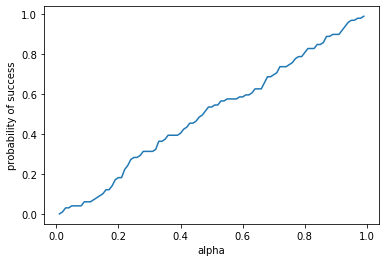

In [16]:
n = 1000
alphas = []
probas = []
for i in range(1, 100):
    alpha = i/100
    values = []
    for j in range(1, 100):
        data = norm.rvs(size=n, random_state=j)
        z1, z2 = get_confidence_interval(data, alpha)
        values.append(1 if (z1 < 0 < z2) else 0)
    alphas.append(alpha)
    probas.append(sum(values) / len(values))
plt.plot(alphas, probas)
plt.xlabel('alpha')
plt.ylabel('probability of success')

Let's have a look on how the length of the confidence interval differs depending on the sample size and the interval level $\alpha$.
We can see that for small sample sizes and confidence level close to 1 the confidence interval is very long. This actually means that it's useless to analyze confidence intervals for such samples. 

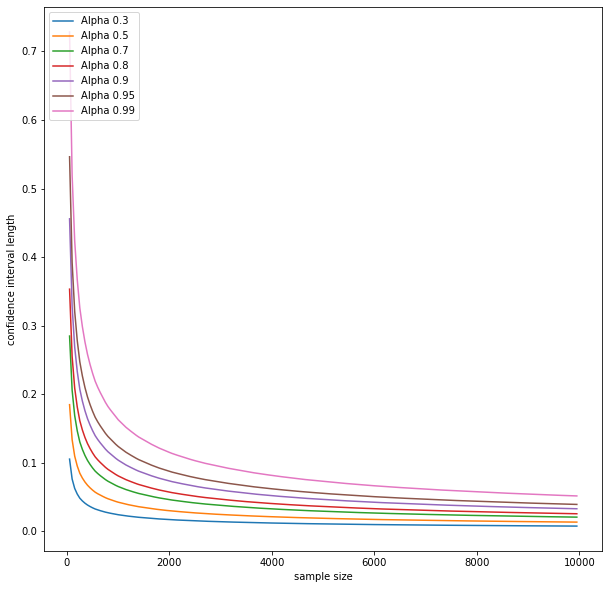

In [17]:
plt.figure(figsize=(10,10))

for alpha in [0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 0.99]:
    ns = []
    lengths = []
    for n in range(1, 10000, 50):
        values = []
        for j in range(1, 100):
            data = norm.rvs(size=n, random_state=j)
            z1, z2 = get_confidence_interval(data, alpha)
            values.append(z2-z1)
        ns.append(n)
        lengths.append(sum(values) / len(values))
    plt.plot(ns, lengths, label=f'Alpha {alpha}')
plt.xlabel('sample size')
plt.ylabel('confidence interval length')
plt.legend(loc="upper left")
plt.show()